In [1]:
from math import pi
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from bokeh.io     import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LinearColorMapper,
    BasicTicker,
    PrintfTickFormatter,
    ColorBar,
)

from bokeh.plotting import figure, output_notebook
from bokeh.palettes import Blues8

%matplotlib inline
output_notebook()

# For the plots
title_fsize=18
ticks_fsize=15

Loading BokehJS ...

In [2]:
# Get raw data
month_list = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']
fnames     = ['Day',1,2,3,4,5,6,7,8,9,10,11,12] # replacing month by number make plotting easiers
mydata     = pd.read_csv('Pluviometry.csv',names=fnames,skiprows=1)
mydata     = mydata.replace(np.nan, 0)

print( '\n-------------------')
print( 'Before Manipulation' )
print( '-------------------')
print( mydata.head(10) )
print( '\n' )

# Adding the year to the raw data (1995 +1 every 31 entry)
Npts = range(0,len(mydata))
date = []
date_iter=1995
for i in Npts:
    if (i!=0 and i%31==0):
        date_iter=date_iter+1
    date.append(date_iter)
YearDim = pd.Series( date , index=Npts )
mydata['Year'] = YearDim
fullDataPerMonthWithYear = mydata  # To be kept for month by month correlations

# Arrange raw data with a bi-dimenstional index
mydata = mydata.set_index( ['Year','Day'] )
mydata.columns.name = 'Month'
print( '\n---------------------------------------------------')
print( 'After adding the year and setting up an (y,d)-index' )
print( '---------------------------------------------------')
print( mydata.head(10) )
print( '\n' )


# Arrange raw data with 3-dimensional index (y,m,d)
mydata = pd.DataFrame( mydata.stack(), columns=['millimeter'] ).reset_index()
mydata = mydata.set_index(['Year','Month','Day'])
print( '\n-------------------')
print( 'After (y,m,d)-index'  )
print( '-------------------'  )
print( mydata.head(10) )
print( '\n' )


# Full Data with 1D index but all information
fullData = mydata
fullData = fullData.reset_index()
print( '\n-----------------------')
print( 'Full data with 1D index'  )
print( '-----------------------'  )
print( fullData.head(10) )
print( '\n' )


-------------------
Before Manipulation
-------------------
   Day    1    2    3    4    5     6    7    8     9    10    11    12
0    1  0.0  0.0  4.5  4.0  0.0   2.5  6.0  0.0   0.0  16.5   0.0   0.0
1    2  0.0  0.0  0.0  1.0  0.0   1.0  0.0  3.0   0.0  14.0   3.5   0.0
2    3  0.0  0.0  0.0  7.0  0.0   0.0  0.0  0.0   0.0   1.5   0.0   0.0
3    4  0.0  0.0  0.0  1.5  0.0   0.0  0.0  0.3   0.0   0.0   0.0   0.0
4    5  0.0  0.0  0.0  3.0  0.0   0.0  0.0  0.0   0.0   4.0   0.0   0.0
5    6  0.0  0.0  0.0  1.5  0.0   0.0  0.0  0.0   0.0   2.0   0.0   0.0
6    7  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  23.0   4.5   0.0   5.5
7    8  1.0  2.0  0.0  2.0  0.0   0.0  0.0  0.0   7.5   2.0   0.0   0.0
8    9  0.0  0.0  0.0  0.0  0.0  48.0  0.0  0.0   0.5   0.0   0.0   0.0
9   10  9.5  0.0  0.0  0.0  0.0  57.0  2.5  0.0   6.0   4.5  15.5  10.0



---------------------------------------------------
After adding the year and setting up an (y,d)-index
----------------------------------------

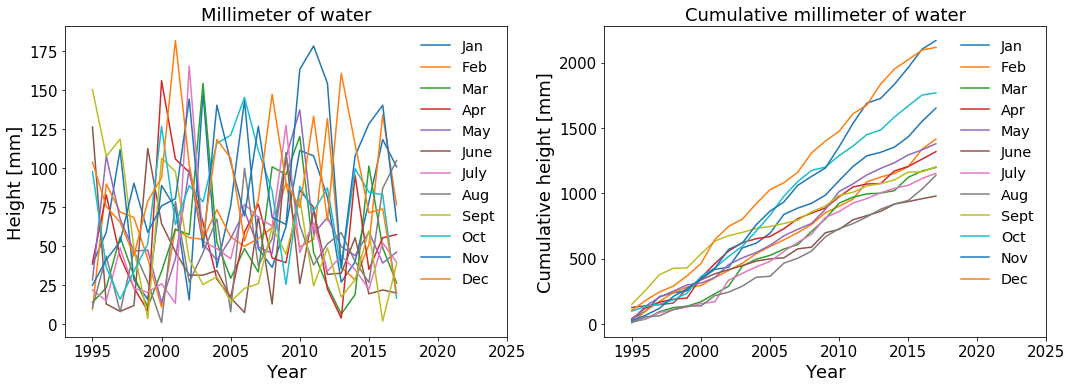

In [3]:
DataPerMonth = fullDataPerMonthWithYear.groupby('Year').sum()  # For each year, sum 31 days (for each column)
DataPerMonth = DataPerMonth.drop('Day',axis=1)                 # Remove the column days (sum=12*31)

plt.figure(figsize=(15,5.5))
plt.subplot(121)
plt.title('Millimeter of water', fontsize=title_fsize)
plt.xlabel('Year', fontsize=title_fsize)
plt.ylabel('Height [mm]', fontsize=title_fsize)
plt.xticks(fontsize=ticks_fsize); plt.yticks(fontsize=ticks_fsize)
plt.xlim(1993,2025)
plt.plot( DataPerMonth )
plt.legend( month_list, frameon=False, loc='best', fontsize='x-large' )

plt.subplot(122)
plt.title('Cumulative millimeter of water', fontsize=title_fsize)
plt.xlabel('Year', fontsize=title_fsize)
plt.ylabel('Cumulative height [mm]', fontsize=title_fsize)
plt.xticks(fontsize=ticks_fsize); plt.yticks(fontsize=ticks_fsize)
plt.xlim(1993,2025)
DataSum = DataPerMonth.apply(np.cumsum)
plt.plot( DataSum )
plt.legend(month_list, frameon=False, loc='best', fontsize='x-large' )

plt.tight_layout()

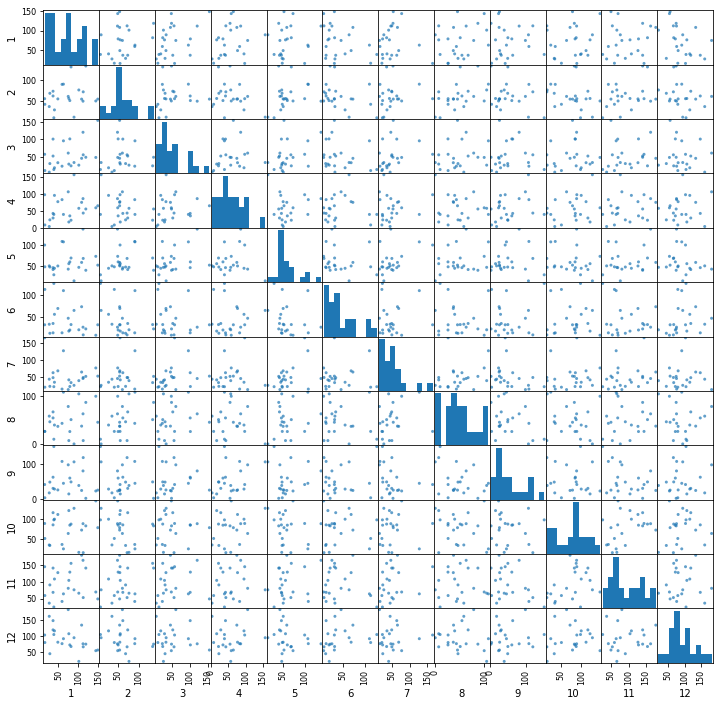

In [4]:
# Probe correlations between the months of the total rain/month
pd.plotting.scatter_matrix(DataPerMonth, figsize=(12,12), alpha=0.7, diagonal='hist')
plt.draw()

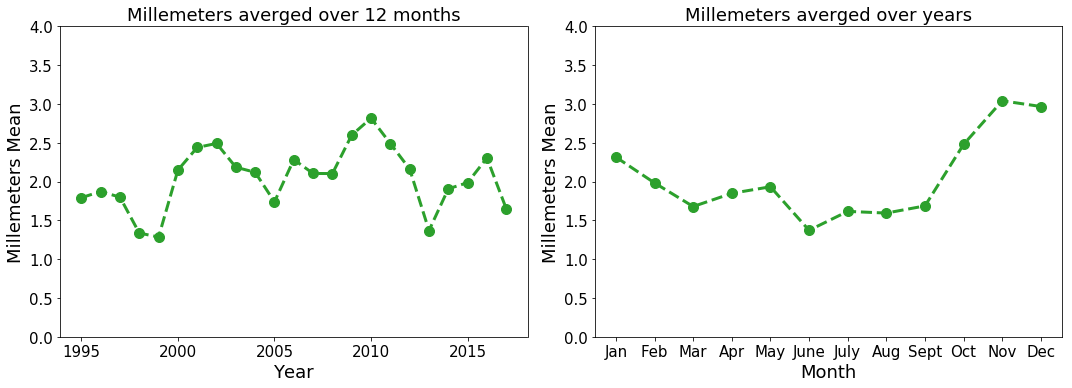

In [5]:
dataYmean = fullData.groupby('Year') .mean() # Average mm over month and days, for each year
dataMmean = fullData.groupby('Month').mean() # Average mm over days and years, for each month
plt.figure(figsize=(15,5.5))
plt.subplot(121)
plt.title("Millemeters averged over 12 months", fontsize=title_fsize)
plt.xlabel('Year', fontsize=title_fsize)
plt.ylabel('Millemeters Mean', fontsize=title_fsize)
plt.xticks(fontsize=ticks_fsize); plt.yticks(fontsize=ticks_fsize)
plt.plot(dataYmean,'o--', markersize=10, linewidth=3)
plt.ylim(0,4)
plt.subplot(122)
plt.title("Millemeters averged over years", fontsize=title_fsize)
plt.xlabel('Month', fontsize=title_fsize)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'])
plt.ylabel('Millemeters Mean', fontsize=title_fsize)
plt.xticks(fontsize=ticks_fsize); plt.yticks(fontsize=ticks_fsize)
plt.plot(dataMmean,'o--', markersize=10, linewidth=3)
plt.ylim(0,4)
plt.tight_layout()

In [6]:
# Prepare dataframe where millimeter is summed over days
df=fullData.groupby(['Year','Month'])  # Goup over years x 
df=df.sum()
df=df.reset_index()
df=df.drop('Day',axis=1)
print( df.head(20) )

    Year  Month  millimeter
0   1995      1       38.50
1   1995      2        9.50
2   1995      3       14.00
3   1995      4       39.50
4   1995      5       28.50
5   1995      6      126.50
6   1995      7       22.00
7   1995      8       10.80
8   1995      9      150.50
9   1995     10       98.00
10  1995     11       25.00
11  1995     12      104.00
12  1996      1       59.00
13  1996      2       90.00
14  1996      3       23.50
15  1996      4       83.00
16  1996      5      108.00
17  1996      6       13.00
18  1996      7       15.00
19  1996      8       43.75


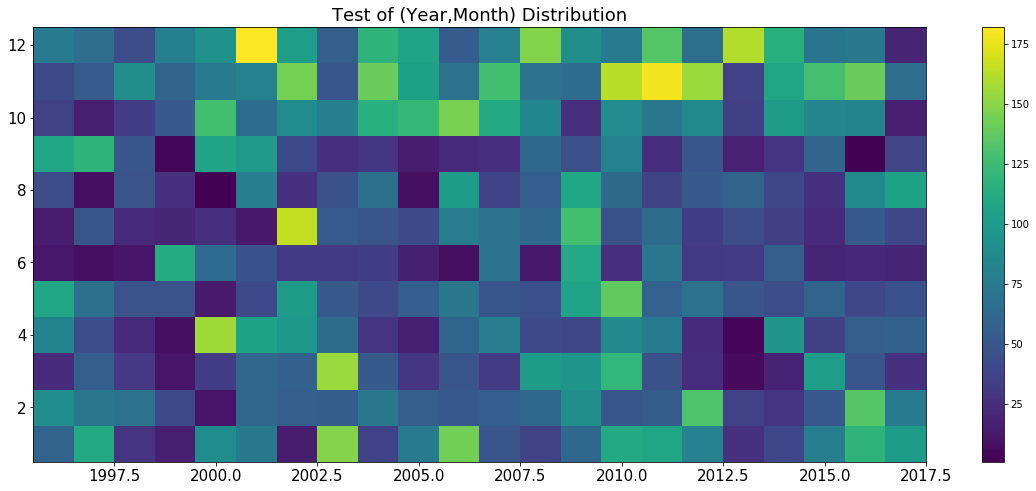

In [7]:
# 2D plot over year and month with matplotlib
plt.figure(figsize=(20,8))
plt.title('Test of (Year,Month) Distribution', fontsize=title_fsize)
plt.xticks(fontsize=ticks_fsize); plt.yticks(fontsize=ticks_fsize)
plt.hist2d( df['Year'], df['Month'], 
           bins=(22, 12), range=( (1995.5,2017.5), (0.5,12.5) ), 
           weights=np.array(df['millimeter']) )
plt.colorbar()

In [8]:
# Convert the year into string - seems to be necessary 
# for bokeh plotting in case of categorical axis
df['YearSTR'] = df['Year']
df['YearSTR'] = df['YearSTR'].astype(str)

# Do the same for month (in order to understand the reversed month string array)
keys=range(1,13)
monthDict = { keys[i] : month_list[i] for i in range(len(keys)) }
df['MonthSTR'] = df['Month'].map(monthDict)

print(df.head(10))

   Year  Month  millimeter YearSTR MonthSTR
0  1995      1        38.5    1995      Jan
1  1995      2         9.5    1995      Feb
2  1995      3        14.0    1995      Mar
3  1995      4        39.5    1995      Apr
4  1995      5        28.5    1995      May
5  1995      6       126.5    1995     June
6  1995      7        22.0    1995     July
7  1995      8        10.8    1995      Aug
8  1995      9       150.5    1995     Sept
9  1995     10        98.0    1995      Oct


In [9]:
# Create a nice colormap (like the original NYTimes plot)
colors = list(reversed(Blues8))
mapper = LinearColorMapper( palette=colors, low=df.millimeter.min(), high=df.millimeter.max() )

# Specify the tools we want on the plot
TOOLS = "hover,save,pan,box_zoom,reset,wheel_zoom"

# Get the array of years and months 
# and convert is in a list of string (needed by x_range arg of figure())
years  = range(df.Year.min() ,df.Year.max() +1)
months = range(df.Month.min(),df.Month.max()+1)
years_str  = list( str(y) for y in years  )
months_str = list( str(m) for m in months )

# Get the data to be plotted
source = ColumnDataSource(data=dict(
    YearSTR=df.YearSTR,
    Month=df.MonthSTR,
    millimeter=df.millimeter
))


In [10]:
# Prepare the figure
Title = "Rain in Lamballe ({0} - {1})".format(years[0], years[-1])
p = figure( title=Title,                          # title, 
            x_range=years_str,                    # x axis range/label
            y_range=list(reversed(month_list)),   # y axis range/label
            x_axis_location="above",              # x axis location
            plot_width=950, plot_height=500,      # figure size 
            tools=TOOLS,                          # load the list of present tools 
            toolbar_location='below'              # Specify location of the toolbar
          )

# Figure cosmetics
p.grid.grid_line_color = None             # no grid
p.title.text_font_size = '12pt'           # title font size
p.axis.axis_line_color = None             # no axis
p.axis.major_tick_line_color = None       # no ticks (seem to work only for categorical axis)
p.axis.major_label_text_font_size = '8pt' # axis label font size
p.axis.major_label_standoff = 0           # axis label offset
p.xaxis.major_label_orientation = pi/5    # axis label angle


# Perform the actual plot
p.rect( x='YearSTR', y='Month',            # feature to be represented on x,y axis
        source=source,                     # source of data
        fill_color={'field': 'millimeter', # color represents 'millimter' feature
                    'transform': mapper},  #  scaled as 'mapper' 
        line_color=None,                   # remove the line between the rectangles
        width=1, height=1                  # size of the rectangles
      )

# Define the color bar
color_bar = ColorBar( color_mapper=mapper,                               # color scale
                      location=(0, 0),                                   # tune the position of the color bar
                      major_label_text_font_size="8pt",                  # label font size
                      ticker=BasicTicker(desired_num_ticks=len(colors)), # tickers style
                      formatter=PrintfTickFormatter(format="%d mm"),     # format the tick labels
                      label_standoff=12,                                 # offset of the tick labels
                      border_line_color=None,                            # remove border
                    )

# Plot the color bar
p.add_layout(color_bar, 'right')

# Specify information to be diplayed by hover
p.select_one(HoverTool).tooltips = [
     ('date'      , '@Month/@YearSTR'),
     ('millimeter', '@millimeter mm')
]

show(p)